In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown

from utils.common.merge_df import (merge_forcast_and_train_df,
                                   remove_NaN_rows)
from utils.common.train_model import (train_model_cv,
                                      train_model_stacking)
from utils.common.test_model import (test_model_cv,
                                     test_model_stacking)
from utils.common.create_features import (create_seasons,
                                          create_datetime_features,
                                          create_adjusted_values,
                                          create_rolling_avg,
                                            astral,
                                            deseasonalized_temperature,
                                            create_lag_features,
                                            add_time_period_column,
                                            shift_radiation)

In [2]:
# Lade Dateien
df_forecast = pd.read_parquet('../Daten/forecasts.parquet')
df_test1 = pd.read_parquet('../Daten/energy_test1.parquet')
df_test2 = pd.read_parquet('../Daten/energy_test2.parquet')
df_train = pd.read_parquet('../Daten/energy_train.parquet')

# preprocessing
df_train, df_forecast = remove_NaN_rows(df_train, df_forecast)

# merge 
merged_df = merge_forcast_and_train_df(df_forecast, df_train)
merged_test_df = merge_forcast_and_train_df(df_forecast, df_test1)
merged_test2_df = merge_forcast_and_train_df(df_forecast, df_test2)

# create feature
merged_df = await create_seasons(merged_df)

# # Erstelle Spalten für Stunden und Monate
merged_df = await create_datetime_features(merged_df)
merged_df = await astral(merged_df)
merged_df = await add_time_period_column(merged_df)
merged_df = await shift_radiation(merged_df)
# merged_df = await deseasonalized_temperature(merged_df)

# # Erstelle Spalten für die adjustierten Werte
# # Können wir wieder auskommentieren wenn wir das wieder testen 
merged_df = await create_adjusted_values(merged_df)
merged_df = await create_rolling_avg(merged_df)
merged_df = await create_lag_features(merged_df)

# # create features for test data
merged_test_df = await create_seasons(merged_test_df)

merged_test_df = await create_seasons(merged_test_df)
merged_test2_df = await create_seasons(merged_test2_df)

merged_test_df = await create_datetime_features(merged_test_df)
merged_test2_df = await create_datetime_features(merged_test2_df)

merged_test_df = await astral(merged_test_df)
merged_test2_df = await astral(merged_test2_df)

merged_test_df = await deseasonalized_temperature(merged_test_df)
merged_test2_df = await deseasonalized_temperature(merged_test2_df)

merged_test_df = await create_rolling_avg(merged_test_df)
merged_test2_df = await create_rolling_avg(merged_test2_df)

merged_test_df = await create_adjusted_values(merged_test_df)
merged_test2_df = await create_adjusted_values(merged_test2_df)

merged_test_df = await add_time_period_column(merged_test_df)
merged_test_df = await shift_radiation(merged_test_df)

merged_test2_df = await add_time_period_column(merged_test2_df)
merged_test2_df = await shift_radiation(merged_test2_df)

#merged_test_df = await create_lag_features(merged_test_df)
#merged_test2_df = await create_lag_features(merged_test2_df)
merged_df

/home/jan-david/Documents/ml1-neu-neu/Analyse_Training/utils/common/create_features.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rolling_Avg_SolarDownwardRadiation'].fillna(df['Median_SolarDownwardRadiation'], inplace=True)
/home/jan-david/Documents/ml1-neu-neu/Analyse_Training/utils/common/create_features.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work

,dtm,ref_datetime,Solar_capacity_mwp,Solar_MWh,valid_time,SolarDownwardRadiation,CloudCover,Temperature,Weather Model,valid_datetime,...,SolarDownwardRadiation_Temperature,Median_SolarDownwardRadiation,Rolling_Avg_SolarDownwardRadiation,rolling_mean_radiation,rolling_mean_temperature,radiation_rolling_std,radiation_rolling_max,radiation_lag1,radiation_lag2,temp_lag1
0,2020-09-21 00:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.0,24,0.000000,0.327759,12.216522,DWD ICON,2020-09-21 00:00:00+00:00,...,0.000000,0.000000,0.000000,0.000000,12.228267,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-09-21 00:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.0,24,0.000000,0.002000,12.240011,NCEP GFS,2020-09-21 00:00:00+00:00,...,0.000000,0.000000,0.000000,0.002946,12.157506,0.000000,0.000000,0.000000,0.000000,12.216522
2,2020-09-21 01:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.0,25,0.008838,0.436067,12.015985,DWD ICON,2020-09-21 01:00:00+00:00,...,0.106196,0.004419,0.004419,0.002946,12.096160,0.005103,0.008838,0.000000,0.000000,12.240011
3,2020-09-21 01:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.0,25,0.000000,0.003000,12.032483,NCEP GFS,2020-09-21 01:00:00+00:00,...,0.000000,0.004419,0.002209,0.008074,11.954034,0.005103,0.008838,0.008838,0.000000,12.015985
4,2020-09-21 02:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.0,26,0.015384,0.468752,11.813635,DWD ICON,2020-09-21 02:00:00+00:00,...,0.181740,0.007692,0.006055,0.005128,11.893166,0.007720,0.015384,0.000000,0.008838,12.032483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39400,2022-12-31 21:00:00+00:00,2022-12-30 18:00:00+00:00,2212.678300,0.0,27,0.000000,1.000000,12.386409,NCEP GFS,2022-12-31 21:00:00+00:00,...,0.000000,0.000000,0.000000,0.000000,11.966100,0.000000,0.000000,0.000000,0.000000,11.899714
39401,2022-12-31 22:00:00+00:00,2022-12-30 18:00:00+00:00,2212.678300,0.0,28,0.000000,0.999715,11.612177,DWD ICON,2022-12-31 22:00:00+00:00,...,0.000000,0.000000,0.000000,0.000000,12.177125,0.000000,0.000000,0.000000,0.000000,12.386409
39402,2022-12-31 22:00:00+00:00,2022-12-30 18:00:00+00:00,2212.678300,0.0,28,0.000000,1.000000,12.532788,NCEP GFS,2022-12-31 22:00:00+00:00,...,0.000000,0.000000,0.000000,0.000716,11.762085,0.000000,0.000000,0.000000,0.000000,11.612177
39403,2022-12-31 23:00:00+00:00,2022-12-30 18:00:00+00:00,2237.476835,0.0,29,0.002148,1.000000,11.141291,DWD ICON,2022-12-31 23:00:00+00:00,...,0.023936,0.001074,0.000537,0.000716,12.045937,0.001241,0.002148,0.000000,0.000000,12.532788


# Aufgabe 5




### Lineares Model



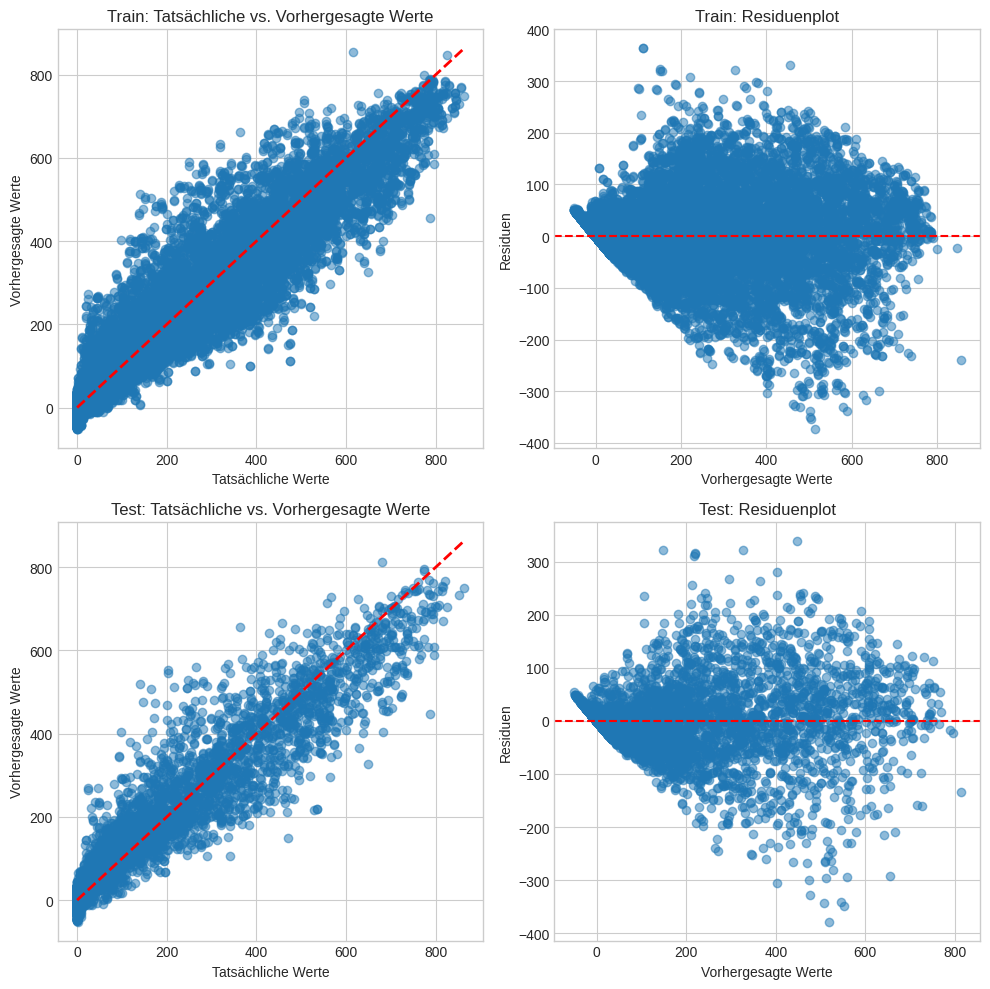

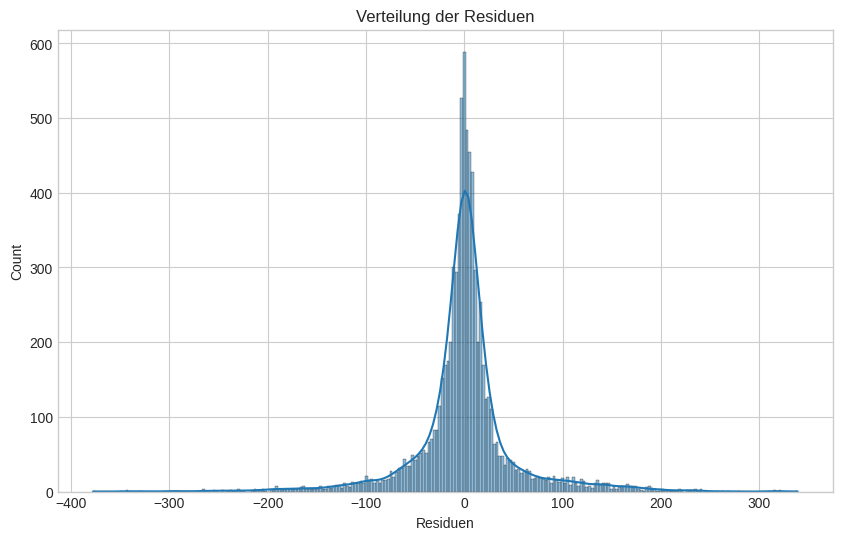

In [3]:
param_grid_ridge = {
    'alpha': np.linspace(0.1, 50, 50),
}

merged_df_copy = merged_df.copy()

pipeline, evaluation_md, test_col, best_params = train_model_cv(merged_df_copy, 
                                                      ["SolarDownwardRadiation",
                                                       "hour",
                                                       "week",
                                                       "month",
                                                       "Weather Model",
                                                       "time_period",
                                                       "Season",
                                                       "sun_altitude",
                                                       "sun_azimuth",
                                                       "Solar_Radiation_lag_1h",
                                                       "solar_efficiency",
                                                       "Median_SolarDownwardRadiation"
                                                       ], 
                                                    "Solar_MWh",
                                                       param_grid_ridge,
                                                       "ridge")

In [4]:
display(Markdown(evaluation_md))

### Ridge(alpha=np.float64(0.1)) Evaluation

| Dataset | R² | RMSE | MAE | Rows | Columns |
|---------|--------:|------------:|--------:|-------:|-------:|
| Train   | 0.91862 | 52.54 | 30.46 | 31524 | 12 |
| Test    | 0.91709 | 52.93 | 30.41 | 7881 | 12 |

### Top 10 Coefficients

| Feature Name                       |   Coefficient |
|:-----------------------------------|--------------:|
| num__solar_efficiency              |    405.066    |
| num__SolarDownwardRadiation        |   -397.306    |
| num__Median_SolarDownwardRadiation |    150.154    |
| cat__week_27                       |    -76.5544   |
| cat__week_26                       |    -69.5387   |
| cat__week_12                       |     67.6709   |
| cat__week_15                       |     67.105    |
| cat__week_16                       |     65.0903   |
| num__sun_altitude                  |     64.1649   |
| cat__week_14                       |     63.5012   |
| cat__week_28                       |    -60.6752   |
| cat__week_29                       |    -59.8058   |
| cat__time_period_Nacht             |     59.1645   |
| cat__week_25                       |    -58.1856   |
| cat__week_35                       |    -57.9432   |
| cat__week_30                       |    -54.1289   |
| cat__week_11                       |     48.1401   |
| cat__week_10                       |     48.0664   |
| cat__week_8                        |     47.325    |
| cat__week_34                       |    -42.7333   |
| cat__month_4                       |    -42.2053   |
| cat__week_6                        |     40.5021   |
| cat__week_5                        |     36.6986   |
| cat__hour_21                       |     35.1647   |
| cat__week_13                       |     35.0442   |
| cat__week_31                       |    -34.6187   |
| cat__time_period_Nachmittag        |    -32.9141   |
| cat__month_1                       |     31.7893   |
| cat__hour_18                       |    -30.6048   |
| cat__week_7                        |     27.5298   |
| cat__month_12                      |     27.2854   |
| cat__Season_Frühling               |    -24.7034   |
| cat__time_period_Mittag            |    -23.8641   |
| cat__hour_0                        |     23.5843   |
| cat__month_3                       |    -23.5003   |
| cat__month_5                       |    -23.1827   |
| cat__hour_4                        |    -22.7868   |
| cat__week_33                       |    -22.0874   |
| cat__week_32                       |    -21.8041   |
| cat__hour_1                        |     21.4269   |
| cat__week_38                       |    -21.0276   |
| cat__hour_5                        |     20.987    |
| cat__month_11                      |     20.4541   |
| cat__time_period_Abend             |     19.7373   |
| cat__hour_23                       |     18.908    |
| cat__week_24                       |    -18.8614   |
| cat__hour_20                       |     17.8597   |
| cat__week_17                       |     17.8159   |
| cat__hour_7                        |    -17.0338   |
| cat__Season_Herbst                 |     16.374    |
| cat__week_18                       |     15.146    |
| cat__week_9                        |     14.7424   |
| cat__hour_16                       |    -14.6285   |
| cat__week_22                       |    -14.2992   |
| cat__week_36                       |    -13.5994   |
| cat__hour_14                       |    -13.4585   |
| cat__time_period_Morgen            |    -13.3772   |
| cat__week_52                       |     13.2103   |
| cat__hour_15                       |    -12.3677   |
| cat__week_20                       |     12.2112   |
| cat__week_40                       |    -12.0032   |
| cat__week_2                        |     11.8982   |
| cat__month_10                      |     11.7763   |
| cat__hour_2                        |     11.6279   |
| cat__week_1                        |     11.326    |
| cat__week_23                       |    -10.8823   |
| cat__month_7                       |     10.3469   |
| cat__hour_8                        |     -9.9906   |
| cat__week_3                        |      9.7718   |
| cat__week_50                       |     -9.74484  |
| cat__hour_22                       |      9.63434  |
| cat__time_period_Vormittag         |     -8.74642  |
| cat__month_8                       |     -8.6026   |
| cat__week_37                       |     -8.26384  |
| cat__week_53                       |      8.09371  |
| cat__month_6                       |     -7.40296  |
| cat__hour_6                        |     -7.33984  |
| cat__hour_11                       |     -7.2667   |
| cat__week_21                       |      5.96491  |
| cat__hour_17                       |     -5.91799  |
| cat__Season_Sommer                 |      5.91706  |
| cat__hour_13                       |     -5.62843  |
| cat__month_9                       |      5.16497  |
| cat__hour_12                       |     -4.77713  |
| cat__week_4                        |      4.59325  |
| cat__week_51                       |      4.22679  |
| cat__week_46                       |     -4.13124  |
| cat__week_41                       |     -4.08312  |
| cat__week_43                       |      4.02396  |
| num__Solar_Radiation_lag_1h        |      3.25638  |
| cat__hour_3                        |     -3.23015  |
| cat__week_47                       |      2.71562  |
| cat__hour_19                       |     -2.68233  |
| cat__week_42                       |     -2.51846  |
| cat__week_39                       |     -2.48888  |
| cat__Season_Winter                 |      2.41236  |
| cat__month_2                       |     -1.92311  |
| cat__week_19                       |      1.54198  |
| cat__hour_9                        |     -1.51934  |
| cat__week_45                       |     -1.43977  |
| cat__week_44                       |     -1.0736   |
| num__sun_azimuth                   |      0.860766 |
| cat__week_49                       |     -0.842071 |
| cat__week_48                       |     -0.621466 |
| cat__Weather Model_DWD ICON        |      0.139103 |
| cat__Weather Model_NCEP GFS        |     -0.139103 |

Number of coefficients that are zero: 0/107


In [5]:
merged_test_pred_df = test_model_cv(pipeline, merged_test_df, test_col)
merged_test2_pred_df = test_model_cv(pipeline, merged_test2_df, test_col)

/home/jan-david/Documents/ml1-neu-neu/Analyse_Training/utils/common/test_model.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
/home/jan-david/Documents/ml1-neu-neu/Analyse_Training/utils/common/test_model.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
/home/jan-david/Documents/ml1-neu-neu/Analyse_Training/utils/common/test_model.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [6]:
merged_test_pred_df.to_pickle('test_ridge.pkl')
merged_test2_pred_df.to_pickle('test2_ridge.pkl')


___


### EntscheidungsBaum


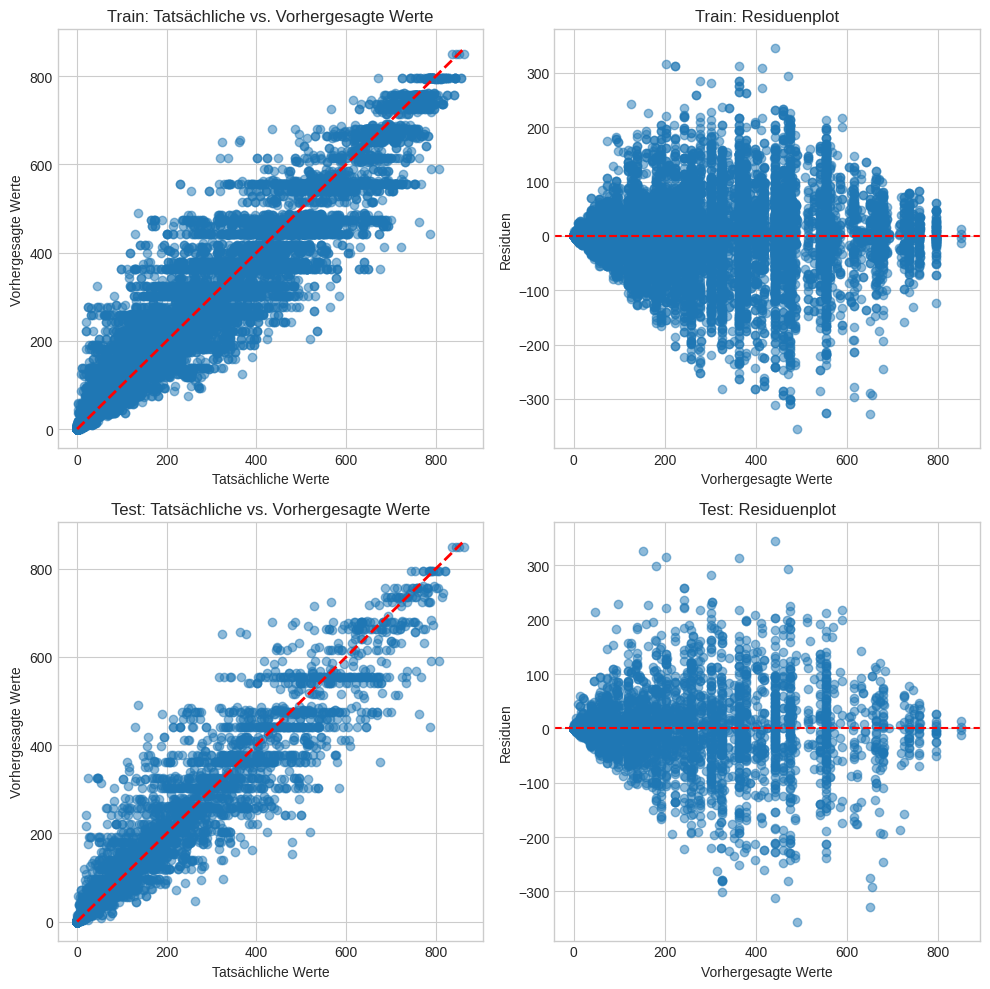

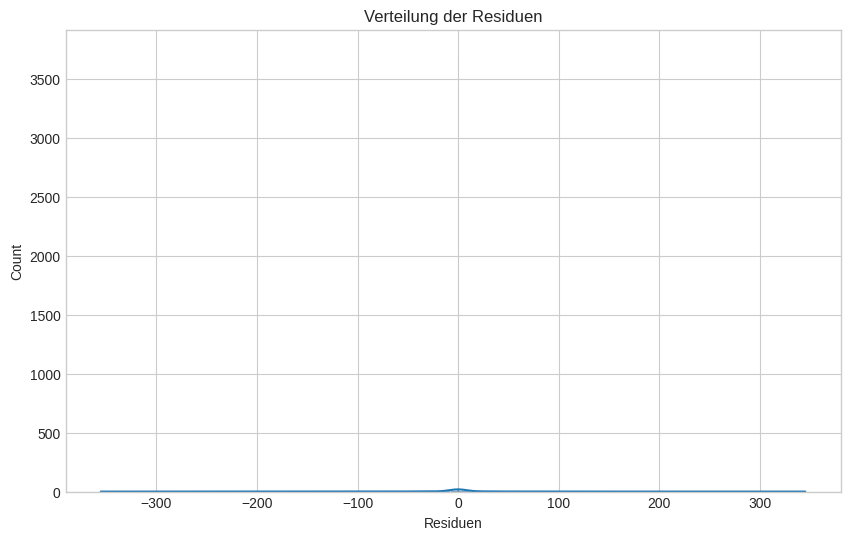

In [7]:
# TODO: train entscheidungsbaum mit Hyperparametersuche

param_grid_dtr = {
    'max_depth': [3, 5, 10, None],            
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4]          
}


merged_df_copy = merged_df.copy()

pipeline, evaluation_md, test_col, best_params = train_model_cv(merged_df_copy, 
                                                      ["SolarDownwardRadiation",
                                                       "hour",
                                                       "week",
                                                       "month",
                                                       "Weather Model",
                                                       "time_period",
                                                       "Season",
                                                       "sun_altitude",
                                                       "sun_azimuth",
                                                       "Solar_Radiation_lag_1h",
                                                       "solar_efficiency",
                                                       "Median_SolarDownwardRadiation"
                                                       ], 
                                                    "Solar_MWh",
                                                       param_grid_dtr,
                                                       "DTR")

In [8]:
display(Markdown(evaluation_md))

### DecisionTreeRegressor Evaluation

| Dataset | R² | RMSE | MAE | Rows | Columns |
|---------|--------:|------------:|--------:|-------:|-------:|
| Train   | 0.94470 | 43.49 | 19.74 | 31524 | 12 |
| Test    | 0.92876 | 48.25 | 21.96 | 7881 | 12 |

### Top 10 Feature Importances

| Feature Name                       |   Importance |
|:-----------------------------------|-------------:|
| num__Median_SolarDownwardRadiation |   0.958708   |
| num__sun_azimuth                   |   0.0156574  |
| num__sun_altitude                  |   0.00573991 |
| num__Solar_Radiation_lag_1h        |   0.00181461 |
| cat__week_35                       |   0.00169757 |
| num__solar_efficiency              |   0.00160455 |
| num__SolarDownwardRadiation        |   0.00154234 |
| cat__time_period_Vormittag         |   0.00133045 |
| cat__Season_Winter                 |   0.00126653 |
| cat__week_9                        |   0.00123663 |

Total feature importance (should be 1.0): 1.00


In [9]:
merged_test_pred_df = test_model_cv(pipeline, merged_test_df, test_col)
merged_test2_pred_df = test_model_cv(pipeline, merged_test2_df, test_col)

merged_test_pred_df.to_pickle('test_DTR.pkl')
merged_test2_pred_df.to_pickle('test2_DTR.pkl')


___

### Ensemble Model



Starting stacking model training...
Splitting data...
Setting up preprocessing pipeline...
Applying transformations...
['num__SolarDownwardRadiation' 'num__sun_altitude' 'num__sun_azimuth'
 'num__Solar_Radiation_lag_1h' 'num__solar_efficiency'
 'num__Median_SolarDownwardRadiation' 'cat__hour_0' 'cat__hour_1'
 'cat__hour_2' 'cat__hour_3' 'cat__hour_4' 'cat__hour_5' 'cat__hour_6'
 'cat__hour_7' 'cat__hour_8' 'cat__hour_9' 'cat__hour_10' 'cat__hour_11'
 'cat__hour_12' 'cat__hour_13' 'cat__hour_14' 'cat__hour_15'
 'cat__hour_16' 'cat__hour_17' 'cat__hour_18' 'cat__hour_19'
 'cat__hour_20' 'cat__hour_21' 'cat__hour_22' 'cat__hour_23' 'cat__week_1'
 'cat__week_2' 'cat__week_3' 'cat__week_4' 'cat__week_5' 'cat__week_6'
 'cat__week_7' 'cat__week_8' 'cat__week_9' 'cat__week_10' 'cat__week_11'
 'cat__week_12' 'cat__week_13' 'cat__week_14' 'cat__week_15'
 'cat__week_16' 'cat__week_17' 'cat__week_18' 'cat__week_19'
 'cat__week_20' 'cat__week_21' 'cat__week_22' 'cat__week_23'
 'cat__week_24' 'cat__

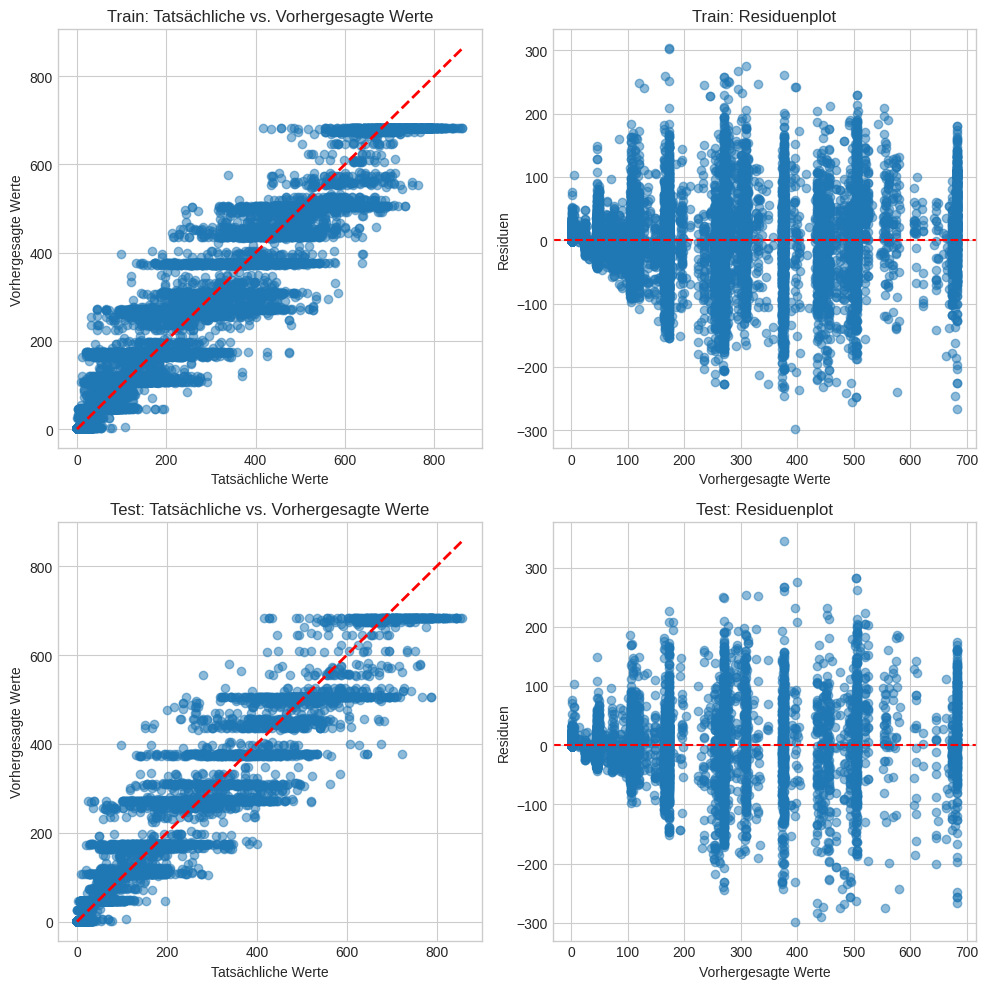

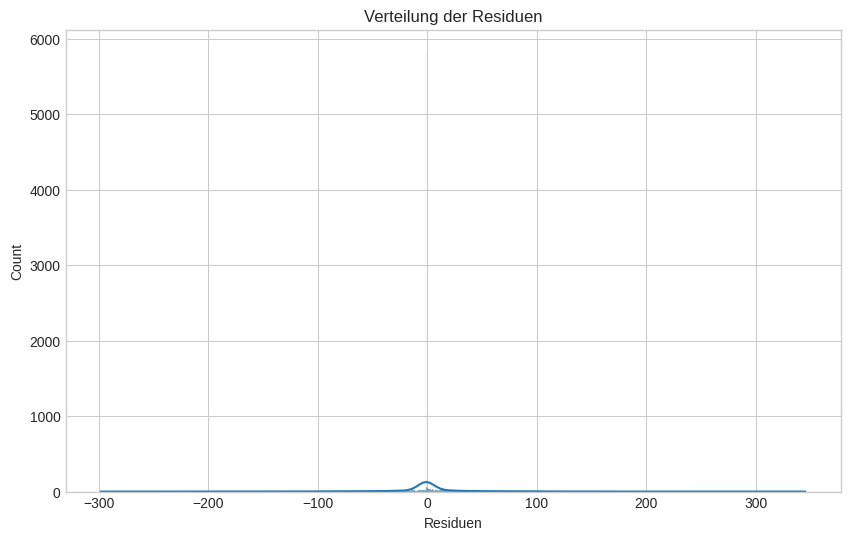

In [10]:
# TODO: train ensemble model mit Hyperparametersuche

param_grid_dtr = {      
}


merged_df_copy = merged_df.copy()

pipeline, evaluation_md, test_col, best_params, preprocessor = train_model_stacking(merged_df_copy, 
                                                      ["SolarDownwardRadiation",
                                                       "hour",
                                                       "week",
                                                       "month",
                                                       "Weather Model",
                                                       "time_period",
                                                       "Season",
                                                       "sun_altitude",
                                                       "sun_azimuth",
                                                       "Solar_Radiation_lag_1h",
                                                       "solar_efficiency",
                                                       "Median_SolarDownwardRadiation"
                                                       ], 
                                                    "Solar_MWh",
                                                       param_grid_dtr)


___

In [13]:
display(Markdown(evaluation_md))

### Stacking Model Evaluation

| Dataset | R² | RMSE | MAE | Rows | Columns |
|---------|-------|------|-----|------|----------|
| Train   | 0.94914 | 41.34 | 20.81 | 27583 | 107 |
| Test    | 0.93681 | 46.73 | 23.18 | 11822 | 107 |

Base Learners:
- Ridge Regression
- DecisionTreeRegressor
- GradientBoost

Best CV Score (RMSE): 48.62


In [25]:
merged_test_pred_df = test_model_stacking(pipeline, merged_test_df, test_col, preprocessor)
merged_test2_pred_df = test_model_stacking(pipeline, merged_test2_df, test_col, preprocessor)

merged_test_pred_df.to_pickle('test_stack.pkl')
merged_test2_pred_df.to_pickle('test2_stack.pkl')

Series([], dtype: int64)
Empty DataFrame
Columns: [dtm, ref_datetime, Solar_capacity_mwp, valid_time, SolarDownwardRadiation, CloudCover, Temperature, Weather Model, valid_datetime, Season, hour, month, week, day_of_year, year, hour_sin, hour_cos, month_sin, month_cos, week_sin, week_cos, day_of_year_sin, day_of_year_cos, sunrise, sunset, dawn, dusk, noon, sun_altitude, sun_altitude_sin, sun_altitude_cos, sun_azimuth, sun_azimuth_sin, sun_azimuth_cos, seasonal_temperature, seasonal_temperature_sin, seasonal_temperature_cos, Median_SolarDownwardRadiation, Rolling_Avg_SolarDownwardRadiation, rolling_mean_radiation, rolling_mean_temperature, radiation_rolling_std, radiation_rolling_max, radiation_lag1, radiation_lag2, temp_lag1, adjusted_radiation, adjusted_temperature, Temperature_sqaured, solar_efficiency, solar_temperature, SolarDownwardRadiation_CloudCover, SolarDownwardRadiation_Temperature, time_period, Solar_Radiation_lag_1h, cat__hour_9, cat__hour_21, cat__hour_7, cat__month_1, ca